In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sindata import sin_data, next_unrolling, show_examples
from vanilla_rnn_w import UNROLLING, X_DIM, Y_DIM, H_DIM, rnn_unrolling, forward_propagation

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None], 'x')
y = tf.placeholder(tf.float32, [None], 'y')

p = forward_propagation(rnn_unrolling(x)[-1:])

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
# load toy data
_, xs = sin_data(50)

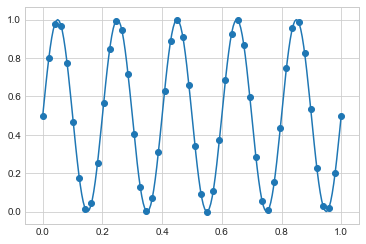

Unrolling 3


In [6]:
show_examples(50)
print('Unrolling', UNROLLING)

In [7]:
# test on train-set
preds = list(xs[:UNROLLING])
for i in range(xs.shape[0]-UNROLLING):
    pv = sess.run(p, {x: preds[-UNROLLING:]})
    preds.append(pv[0, 0])
    #print(pv, preds[-UNROLLING:])

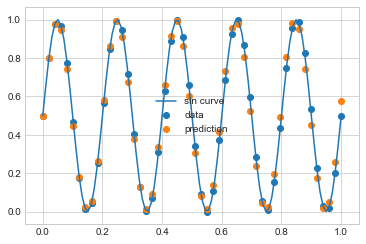

In [8]:
plt.plot(*sin_data(100))
plt.scatter(_, xs)
plt.scatter(_, preds)
plt.legend(['sin curve', 'data', 'prediction'])
plt.show()

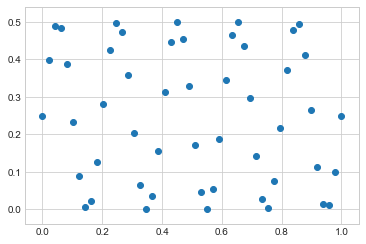